In [2]:

import pandas as pd
import numpy as np
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics 




In [3]:
data = pd.read_csv("insurance.csv")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
data.shape

(1338, 7)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
print(data.sex.value_counts())
print(data.smoker.value_counts())
print(data.region.value_counts())

sex
male      676
female    662
Name: count, dtype: int64
smoker
no     1064
yes     274
Name: count, dtype: int64
region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64


In [7]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


C:\Users\USER\AppData\Local\Temp\ipykernel_12636\2606406597.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(data['age'], color='green')


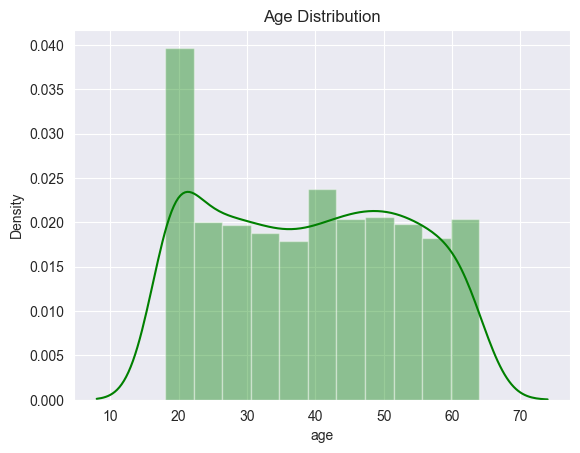

In [14]:
sn.set_style('darkgrid')
import matplotlib.pyplot as plt
sn.distplot(data['age'], color='green')
plt.title('Age Distribution')
plt.show()

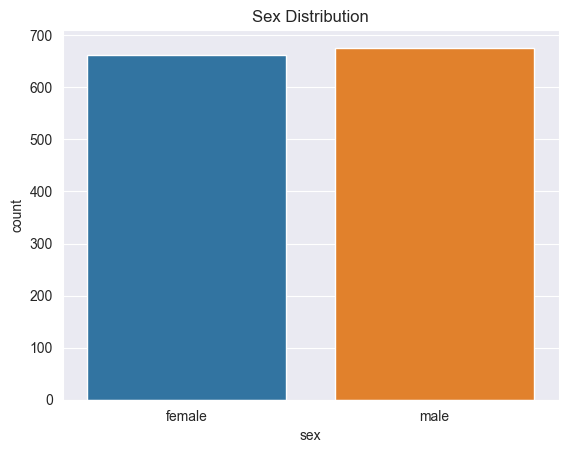

In [15]:
sn.countplot(x='sex', data=data)
plt.title('Sex Distribution')
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_12636\1028580619.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(data['bmi'], color='blue')


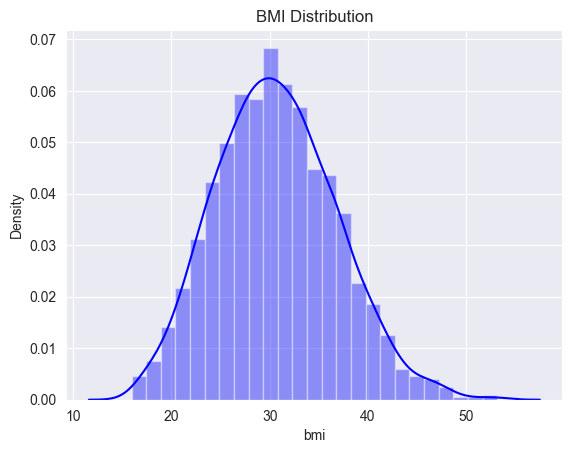

In [16]:
sn.distplot(data['bmi'], color='blue')
plt.title('BMI Distribution')
plt.show()

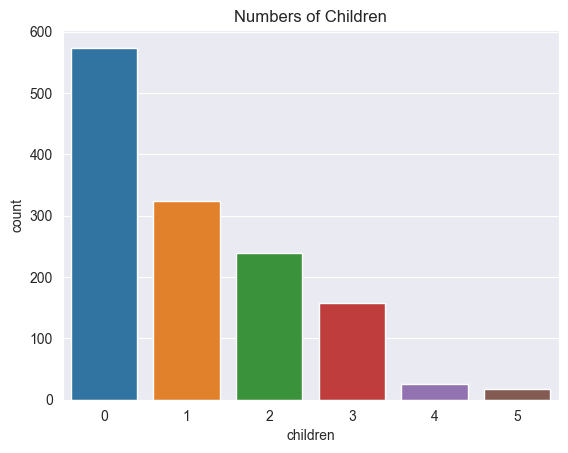

In [18]:
sn.countplot(x='children', data=data)
plt.title('Numbers of Children')
plt.show()

In [19]:
data['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

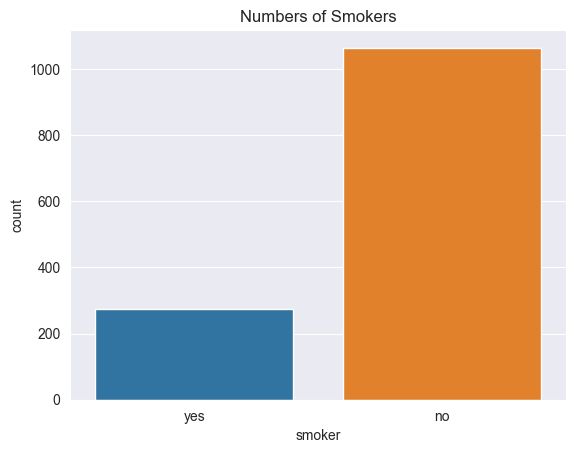

In [20]:
sn.countplot(x='smoker', data=data)
plt.title('Numbers of Smokers')
plt.show()

In [21]:
data['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

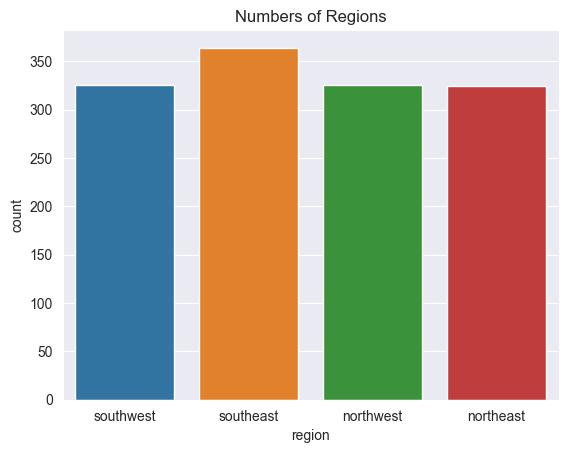

In [22]:
sn.countplot(x='region', data=data)
plt.title('Numbers of Regions')
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_12636\4160332637.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(data['charges'], color='brown')


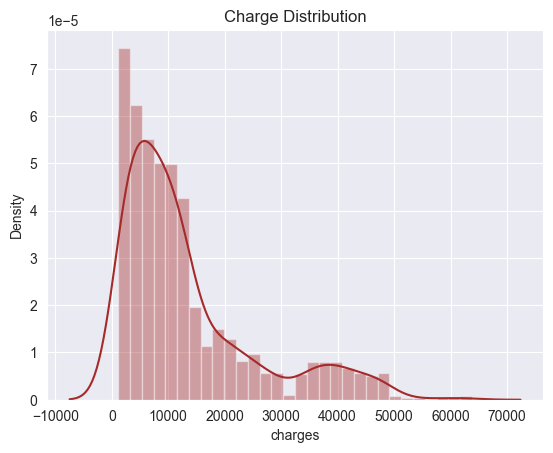

In [23]:
sn.distplot(data['charges'], color='brown')
plt.title('Charge Distribution')
plt.show()

In [24]:
print(data.sex.value_counts())
print(data.smoker.value_counts())
print(data.region.value_counts())

sex
male      676
female    662
Name: count, dtype: int64
smoker
no     1064
yes     274
Name: count, dtype: int64
region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64


In [25]:
data.replace({'sex':{'male':0, 'female':1}}, inplace=True)

In [26]:
data.replace({'smoker':{'no':0, 'yes':1}}, inplace=True)

In [27]:
data.replace({'region':{'southeast':0, 'southwest':1, 'northwest':2, 'northeast':3}}, inplace=True)

In [28]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,0,33.770,1,0,0,1725.55230
2,28,0,33.000,3,0,0,4449.46200
3,33,0,22.705,0,0,2,21984.47061
4,32,0,28.880,0,0,2,3866.85520


In [29]:
x = data.drop(['charges'], axis=1)
y = data['charges']

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=2)

In [31]:
print(x_train.shape, x_test.shape)

(1070, 6) (268, 6)


In [32]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [33]:
x_training_data = model.predict(x_train)


In [34]:
r2_train = metrics.r2_score(y_train, x_training_data)
print('R Square Value :', r2_train)

R Square Value : 0.7518195459072954


In [35]:
x_testing_data = model.predict(x_test)
r2_test = metrics.r2_score(y_test, x_testing_data)
print('R Square Value :', r2_test)

R Square Value : 0.7454471618659975


In [41]:
#Build a Predicting System
input_data = (32,0,28.880,0,0,2)

#Changing input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

#reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

prediction = model.predict(input_data_reshaped)
print(prediction)

[5476.8728605]


c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [37]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,0,33.770,1,0,0,1725.55230
2,28,0,33.000,3,0,0,4449.46200
3,33,0,22.705,0,0,2,21984.47061
4,32,0,28.880,0,0,2,3866.85520
